<a href="https://colab.research.google.com/github/ReemYounis123/GenAI-projects/blob/main/Reem_Younis_Autoencoding_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

#**Loading Data**#

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#**Reading Data**

In [ ]:
print('X_train: ' ,train_X.shape)
print('Y_train: ' ,train_y.shape)
print('X_test:  ' ,test_X.shape)
print('Y_test:  ' ,test_y.shape)

X_train:  (60000, 28, 28)
Y_train:  (60000,)
X_test:   (10000, 28, 28)
Y_test:   (10000,)


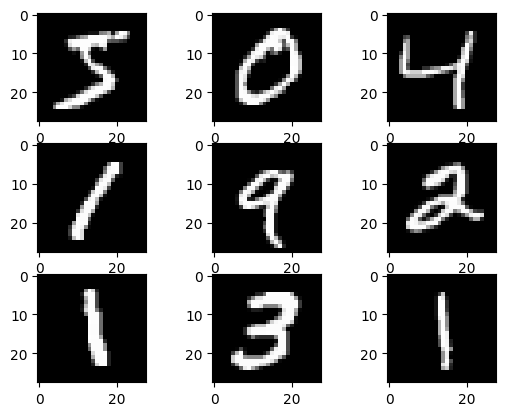

In [ ]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
plt.show()

#**Adding Noise to the training and test data**

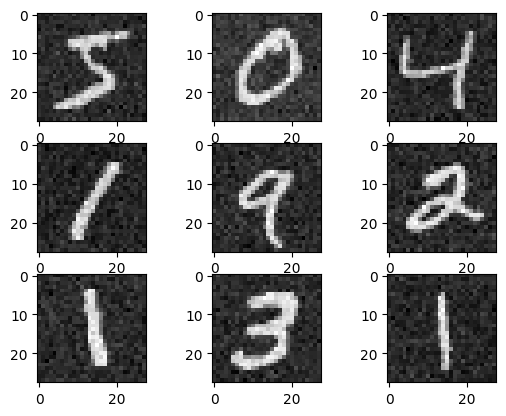

In [ ]:
# Generate Gaussian noise
noise = np.random.randn(*train_X.shape)

# Scale the noise
noise *= 20

# Add the noise to the image
noisy_image = train_X + noise

for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(noisy_image[i], cmap=plt.get_cmap('gray'))

plt.show()


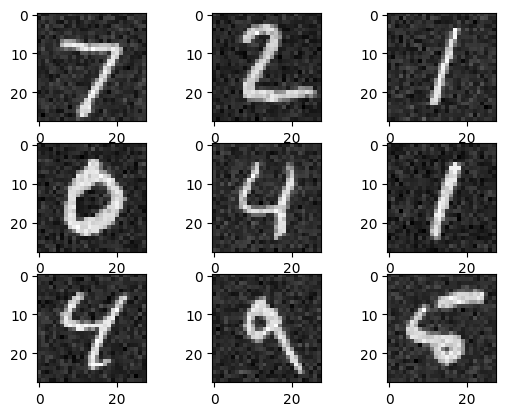

In [ ]:
# Generate Gaussian noise
noise_test = np.random.randn(*test_X.shape)

# Scale the noise
noise_test *= 20

# Add the noise to the image
noisy_image_test = test_X + noise_test

for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(noisy_image_test[i], cmap=plt.get_cmap('gray'))

plt.show()

In [ ]:
train_X= train_X / 255.0
test_X = test_X / 255.0
noisy_image=noisy_image/255.0
noisy_image_test=noisy_image_test/255.0
train_X.shape

(60000, 28, 28)

#**Training Auto encoder Model**

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())

#model.add(tf.keras.layers.Dense(200, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))

model.add(tf.keras.layers.Dense(10, activation="sigmoid"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
#model.add(tf.keras.layers.Dense(200, activation="relu"))

model.add(tf.keras.layers.Dense(28 * 28, activation="sigmoid"))

model.add(tf.keras.layers.Reshape((28, 28)))


In [ ]:
model.compile(optimizer='adam', loss='MeanSquaredError')


In [ ]:
autoencoder = model.fit(noisy_image,train_X,epochs=35)

Epoch 1/35
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0198
Epoch 2/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0197
Epoch 3/35
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0197
Epoch 4/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0196
Epoch 5/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0196
Epoch 6/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0196
Epoch 7/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0195
Epoch 8/35
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0195
Epoch 9/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0195
Epoch 10/35
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0194
Epoch 11/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0194
Epoch 12/35
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0194
E

#**Testing**

In [ ]:
X_new = noisy_image_test[:10]
y_pred = model.predict(X_new)

y_pred

1/1 [==============================] - 0s 20ms/step


array([[[8.39099539e-06, 1.25421066e-05, 1.06970801e-05, ...,
         1.39169870e-05, 8.55459803e-06, 9.60585385e-06],
        [9.63723505e-06, 1.91209838e-05, 1.03150678e-05, ...,
         1.56768965e-05, 1.08984423e-05, 1.38223495e-05],
        [1.19834503e-05, 1.49908010e-05, 1.10967012e-05, ...,
         1.71680604e-05, 1.13575525e-05, 1.67666913e-05],
        ...,
        [1.21979101e-05, 1.25915540e-05, 2.33530282e-05, ...,
         1.48760146e-05, 9.76619958e-06, 1.56177302e-05],
        [1.57371123e-05, 9.91383604e-06, 1.10263927e-05, ...,
         1.77256134e-05, 1.28503343e-05, 1.41098280e-05],
        [1.37238376e-05, 1.30991830e-05, 1.41618502e-05, ...,
         1.08358554e-05, 1.30768540e-05, 6.84833822e-06]],

       [[1.57739453e-06, 1.62963761e-06, 1.74330410e-06, ...,
         1.04170317e-06, 1.55457519e-06, 1.19029653e-06],
        [8.69229439e-07, 1.15103853e-06, 1.53553367e-06, ...,
         9.72744488e-07, 1.28593399e-06, 1.47917069e-06],
        [1.56382998e-06, 

#Original

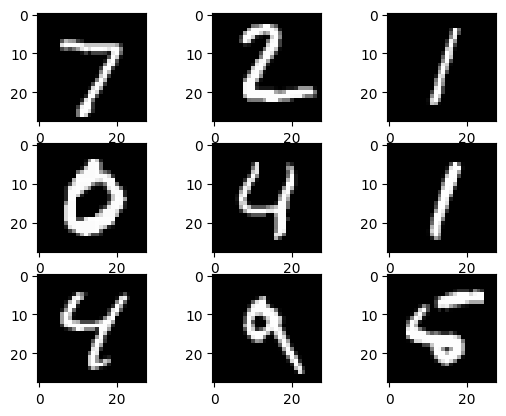

In [ ]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(test_X[i], cmap=plt.get_cmap('gray'))

plt.show()

#Noisy

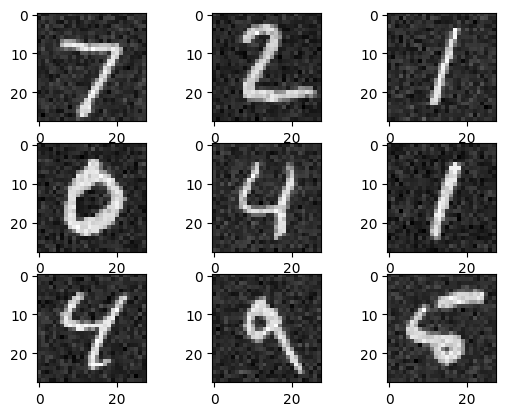

In [ ]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(noisy_image_test[i], cmap=plt.get_cmap('gray'))

plt.show()

#Reconstructed

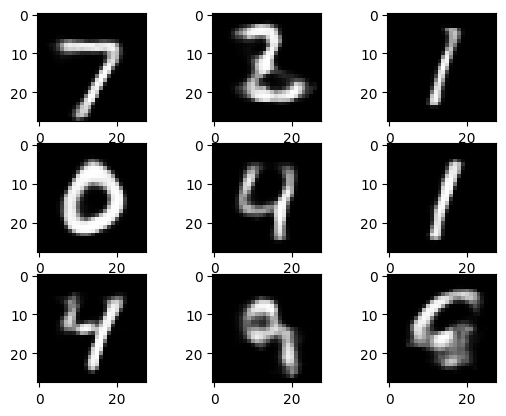

In [ ]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(y_pred[i], cmap=plt.get_cmap('gray'))

plt.show()